In [ ]:
import random
import torch

from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
def seed_everything(seed=429):
  """Function to set reproducibility of results"""
  random.seed(seed)
  #os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.stats import norm

# Parameters
D = 0.003
theta = 0.1
delta_t = 1.0
num_samples = 110 # Number of random samples

# Randomly sample y and t_init values within the specified ranges
y_values = np.random.uniform(0.3, 0.9, num_samples)
t_init_values = np.random.uniform(0.01, 2, num_samples)

# Initialize arrays to store resulting distributions
pmf_ins = []  # Initialize an array for PMFs
pmf_outs = []

# Function to calculate the PDF of the resulting distribution
def calculate_resulting_pdf(y, t_init):
    mu_t = y * np.exp(-theta * t_init)
    var_t = D * (1 - np.exp(-2 * theta * t_init)) / theta
    sigma_t = np.sqrt(var_t)

    lower_bound, upper_bound = 0, 1
    a = (lower_bound - mu_t) / sigma_t
    b = (upper_bound - mu_t) / sigma_t

    pdf = truncnorm.pdf(np.linspace(lower_bound, upper_bound, 100), a, b, loc=mu_t, scale=sigma_t)
    return pdf

# Calculate the resulting PDFs and PMFs for randomized y and t_init values
def pdf2pmf(in_name, out_name, seed):
  seed_everything(seed)
  for y_val, t_init_val in zip(y_values, t_init_values):
      pdf_in = calculate_resulting_pdf(y_val, t_init_val)
      pdf_out = calculate_resulting_pdf(y_val, t_init_val + delta_t)

      # Convert PDF to PMF by normalizing
      pmf_in = pdf_in / np.sum(pdf_in)
      pmf_out = pdf_out / np.sum(pdf_out)

      pmf_in = [float(f"{round(value, 10):.10f}") for value in pmf_in]
      pmf_out = [float(f"{round(value, 10):.10f}") for value in pmf_out]

      pmf_ins.append(pmf_in)
      pmf_outs.append(pmf_out)

#   np.savetxt('/content/drive/MyDrive/Adv/OU data/' + in_name + '.dat', pmf_ins, delimiter=' ')
#   np.savetxt('/content/drive/MyDrive/Adv/OU data/' + out_name + '.dat', pmf_outs, delimiter=' ')

pdf2pmf('train_x', 'train_y', 429)
pdf2pmf('test_x', 'test_y', 0)

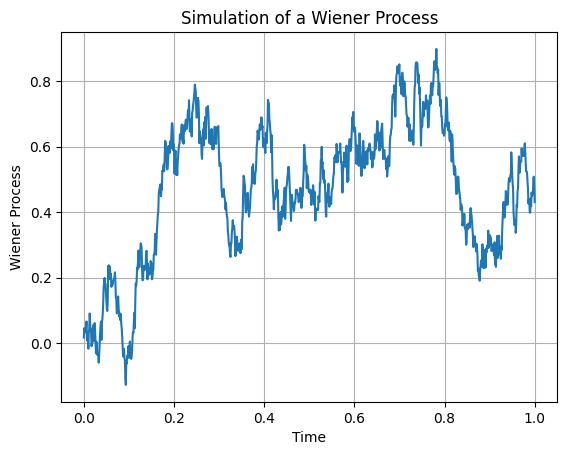

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
T = 1.0         # Total simulation time
N = 1000        # Number of time steps
dt = T / N      # Time step size

# Generate normally distributed random increments
dW = np.sqrt(dt) * np.random.randn(N)

# Create an array to store the Wiener process
W = np.cumsum(dW)

# Create an array of time values
t = np.linspace(0, T, N)  # Adjusted N to match the length of W

# Plot the Wiener process
plt.plot(t, W)
plt.xlabel('Time')
plt.ylabel('Wiener Process')
plt.title('Simulation of a Wiener Process')
plt.grid(True)
plt.show()
